# K-means 演算法

K-means 是一種常見的**非監督式學習**聚類演算法，目的是將數據分成 \( K \) 個不同的群集（Clusters），使得群集內部的數據點相似度最大，而群集之間的相似度最小。

---

## 主要特點
- **無監督學習**：不需要標籤資料，依據數據特徵進行聚類。
- **適用於大規模數據**：計算效率高，適合處理大量數據。
- **依賴距離度量**：通常使用歐幾里得距離進行計算。

---

## K-means 的工作原理

1. **選擇 K 值**：  
   - 設定要劃分的群集數 \( K \)。

2. **隨機初始化中心點**：  
   - 在數據集中隨機選擇 \( K \) 個初始中心點（Centroids）。

3. **計算距離並分配樣本**：  
   - 計算每個數據點到所有中心的距離，將其分配給最近的中心。

4. **重新計算中心點**：  
   - 根據每個群集內的所有點，計算新的中心位置（均值）。

5. **重複步驟 3 和 4**：  
   - 直到中心點不再發生變化，或達到最大迭代次數。

---

## K-means 聚類的數學公式

給定數據點集 \( X = \{x_1, x_2, ..., x_n\} \)，演算法的目標是最小化以下**平方誤差函數（SSE, Sum of Squared Errors）**：

\[
J = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
\]

其中：
- \( K \) 為群集數量
- \( x \) 表示數據點
- \( \mu_i \) 是第 \( i \) 個群集的中心
- \( C_i \) 表示第 \( i \) 個群集內的所有數據點

---

## K-means 的優缺點

### 優點
- **簡單易實現**：易於理解與實現，計算速度快。
- **適用於大規模數據**：計算效率較高。
- **結果較容易解釋**：提供直觀的聚類結果。

### 缺點
- **需手動指定 K 值**：選擇不當會影響結果。
- **對初始中心敏感**：不同的初始點可能導致不同的結果。
- **對異常值敏感**：容易受極端值影響，導致群集中心偏移。
- **僅適用於凸形群集**：無法處理複雜形狀的數據分佈。

---

## 如何選擇最佳 K 值？

1. **手肘法則 (Elbow Method)**  
   - 計算不同 \( K \) 值的總平方誤差（SSE），選擇「肘部」處的 \( K \) 值。
   
   \[
   SSE = \sum_{i=1}^{K} \sum_{x \in C_i} \| x - \mu_i \|^2
   \]

2. **輪廓係數 (Silhouette Score)**  
   - 衡量數據點與同群集內點的距離與其他群集的距離，取值範圍為 [-1,1]，數值越高代表聚類效果越好。

3. **交叉驗證 (Cross-validation)**  
   - 對於具有標籤的情況，測試不同的 \( K \) 值對應的聚類表現。

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
X = X[:,2:4] #為了方便視覺化，因此暫時只取兩個特徵

## 建立模型

- **n_clusters**:  
  指定分群數量 (k 值)。

- **init**:  
  起始值設定方式，可選擇以下幾種：
  - `'random'`：隨機初始化。
  - `'k-means++'`：改進初始化方法。
  - 自行給定初始值。

- **max_iter**:  
  最大迭代次數。

- **tol**:  
  中心點誤差忍受範圍 (建議不要設為 0)。

- **random_state**:  
  指定隨機種子，確保結果可重現。


In [3]:
KM = KMeans(n_clusters= 3, init='k-means++', max_iter=300, tol=1e-4, random_state=33)
KM.fit(X)

KMeans(n_clusters=3, random_state=33)

In [4]:
KM.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## 圖像化分群

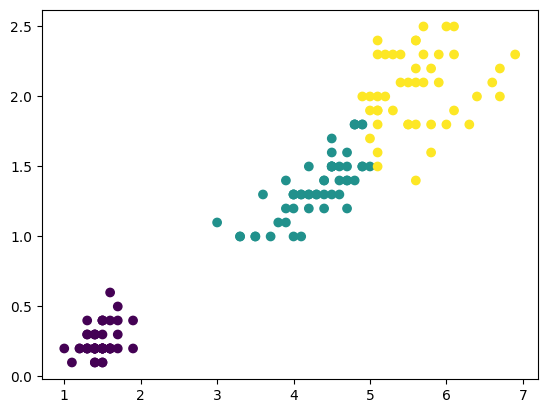

In [5]:
plt.scatter(X[:,0],X[:,1], c=KM.predict(X))

### K-means & K-medoids 比較
| 特性                 | K-means               | K-medoids               |
|----------------------|-----------------------|-------------------------|
| 中心點定義           | 平均值                | 實際資料點              |
| 距離度量方式         | 固定為歐幾里得距離    | 支援多種距離度量        |
| 對異常值的敏感性     | 高                    | 低                      |
| 計算效率             | 快                    | 慢                      |
| 適用資料類型         | 數值型資料            | 數值或分類資料          |

## K-Medoids
- 中心點為實際樣本點，且心中心點的決定方式為選取使群內距離和最小的點

In [6]:
pip install scikit-learn-extra -q

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn_extra.cluster import KMedoids
KMed=KMedoids(n_clusters=3,init='random',random_state=5)
KMed.fit(X)

KMedoids(init='random', n_clusters=3, random_state=5)

In [8]:
KMed.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

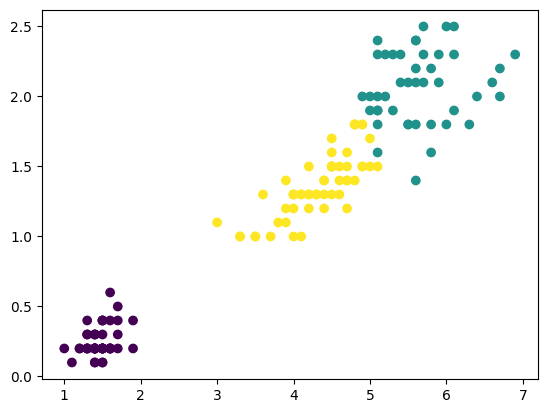

In [9]:
plt.scatter(X[:,0],X[:,1], c=KMed.predict(X))